In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
import warnings

## Before performing any dimensionality reduction, write a program to use k-means clustering on the Madelon dataset. Try the following k values: 4, 8, 16, 32, 64. 

### 1. What preprocessing techniques did you apply, if any?

In [2]:
### read data
madelon = pd.read_csv("madelon.csv")
madelon = madelon.set_index(madelon.columns[0])

In [3]:
### check basic info
madelon.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V491,V492,V493,V494,V495,V496,V497,V498,V499,V500
count,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,...,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000
mean,481.742308,483.551154,509.338846,483.364615,500.925769,479.351923,480.488462,476.569615,487.016154,478.806538,...,482.255000,478.803462,486.250769,497.734615,493.812308,510.731538,478.151154,483.157308,508.436538,490.588077
std,6.312905,30.338955,38.798710,8.943204,41.356829,6.896949,40.428218,1.391642,15.277242,7.308349,...,20.857658,4.034889,23.682591,127.455585,34.883461,37.701112,5.863052,13.607801,37.030636,25.926791
min,462.000000,377.000000,370.000000,453.000000,360.000000,459.000000,334.000000,471.000000,430.000000,455.000000,...,407.000000,463.000000,391.000000,103.000000,368.000000,353.000000,457.000000,435.000000,363.000000,403.000000
25%,478.000000,464.000000,484.000000,477.000000,474.000000,475.000000,453.000000,476.000000,477.000000,474.000000,...,468.000000,476.000000,471.000000,405.750000,470.000000,486.000000,474.000000,474.000000,483.000000,473.000000
50%,482.000000,484.000000,509.000000,483.000000,500.000000,479.000000,481.000000,477.000000,487.000000,479.000000,...,482.000000,479.000000,486.000000,505.500000,493.000000,510.000000,478.000000,483.000000,508.000000,491.000000
75%,486.000000,504.000000,535.000000,489.000000,527.000000,484.000000,507.000000,477.000000,497.000000,484.000000,...,496.000000,481.000000,502.000000,586.250000,517.000000,536.000000,482.000000,492.000000,533.000000,508.000000
max,503.000000,610.000000,654.000000,519.000000,688.000000,505.000000,611.000000,482.000000,547.000000,505.000000,...,549.000000,497.000000,571.000000,920.000000,615.000000,661.000000,500.000000,535.000000,644.000000,593.000000


In [4]:
### check basic info
madelon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2600 entries, 0 to 2599
Columns: 500 entries, V1 to V500
dtypes: int64(500)
memory usage: 9.9 MB


In [5]:
### check if contains null value
madelon.isnull().sum().sort_values()

V1      0
V342    0
V341    0
V340    0
V339    0
       ..
V160    0
V159    0
V158    0
V171    0
V500    0
Length: 500, dtype: int64

In [6]:
### normalize data
X = sklearn.preprocessing.scale(madelon , axis = 0)

1. I check the basic information of the dataset with describe and info functions.
2. I look into null values, and identify no column that needs to be removed.
3. I then normalize the data, to make the model more precise and efficeint.

### 2. Describe qualitatively: how does the number of clusters affect the performance of the clustering algorithm on the dataset? 

In [7]:
inertias = []

In [8]:
def kmeans_with_different_n(n , initiate_points):
    cluster = KMeans(n_clusters = n , random_state = 10 , n_init = initiate_points)
    cluster.fit(X)
    SSE = cluster.inertia_
    print("SSE : " , SSE)
    return cluster.inertia_

### Cluster of 4

In [9]:
cluster_4_sse = kmeans_with_different_n(4 , 10)

inertias.append(cluster_4_sse)

SSE :  1277960.2386878694


### Cluster of 8

In [10]:
cluster_8_sse = kmeans_with_different_n(8 , 10)

inertias.append(cluster_8_sse)

SSE :  1268707.449114589


### Cluster of 16

In [11]:
cluster_16_sse = kmeans_with_different_n(16 , 10)

inertias.append(cluster_16_sse)

SSE :  1260531.7104440327


### Cluster of 32

In [12]:
cluster_32_sse = kmeans_with_different_n(32 , 10)

inertias.append(cluster_32_sse)

SSE :  1250473.3364554713


### Cluster of 64

In [13]:
cluster_64_sse = kmeans_with_different_n(64 , 10)

inertias.append(cluster_64_sse)

SSE :  1233035.6949385996


The higher k is, the lower model turns out to be.

### 3 .Generate a plot of the number of clusters k (x-axis) versus the sum of squared distance (SSE) between data points and their assigned centroids (y-axis). What appears to be the optimal k from the list of values you used, and why? 


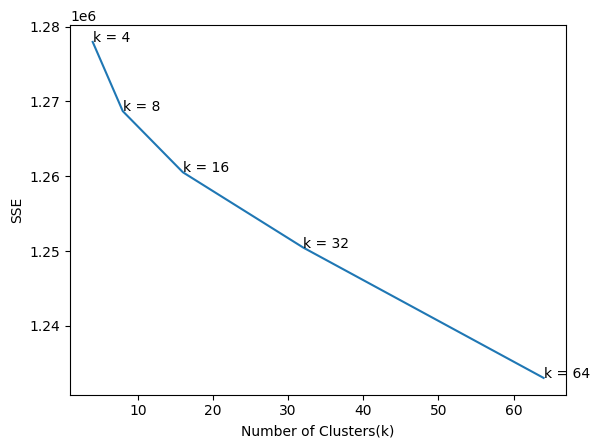

In [14]:
k_number = [4,8,16,32,64]

plt.plot(k_number , inertias)
plt.xlabel("Number of Clusters(k)")
plt.ylabel("SSE")

for i, x_value in enumerate(k_number):
    plt.annotate(f"k = {x_value}", (k_number[i], inertias[i]))

According to the elbow row, I think the best k in this case will be 16.

### 4. For k = 8, how did you initialize the set of cluster centroids before running k-means? Rerun k-means again, this time ensuring that the centroids are all different. Does this – and if so, to what extent – affect the final clusters created?

In [15]:
def kmeans_with_different_centroid(centroid , initiate_points):
    warnings.simplefilter("ignore")
    cluster = KMeans(n_clusters = 8 , random_state = 0 , n_init = initiate_points, init = centroid)
    cluster.fit(X)
    SSE = cluster.inertia_
    #print("Centroid method : " , centroid)
    print("SSE : " , SSE)
    return cluster.inertia_

In [16]:
### randomly generate centroids nrows = number of clusters, ncols = number of features and different seeds
def create_centroid(nrows , ncols , seed):
    np.random.seed(seed)
    return np.random.random(size = [nrows , ncols])

Generate 100 different starting points

In [17]:
plot_sse_list = []
for i in range(0 , 100):
    temp_SSE = kmeans_with_different_centroid(create_centroid(8 , 500 , i) , 10)
    plot_sse_list.append(temp_SSE)

SSE :  1268856.8919951485
SSE :  1270440.3770307056
SSE :  1267722.643436357
SSE :  1268504.8523084102
SSE :  1269173.0925972203
SSE :  1269563.8199447708
SSE :  1269746.1363782221
SSE :  1269597.320863123
SSE :  1269457.9909918047
SSE :  1269628.6349980095
SSE :  1268893.845897263
SSE :  1268675.1446062531
SSE :  1271465.9955694547
SSE :  1269824.7647651464
SSE :  1268659.2208086366
SSE :  1270300.687944519
SSE :  1269489.9490145615
SSE :  1268719.5308918483
SSE :  1268480.0056492523
SSE :  1269591.054712677
SSE :  1268838.482597167
SSE :  1268873.4671536633
SSE :  1269650.87273223
SSE :  1269154.6342881792
SSE :  1269699.9254347559
SSE :  1268757.4090577965
SSE :  1268651.2777758136
SSE :  1269272.384692669
SSE :  1268412.5716208238
SSE :  1268811.2208768486
SSE :  1268528.906007891
SSE :  1268719.9033286595
SSE :  1268753.4757488896
SSE :  1270626.7806399437
SSE :  1270118.9875027386
SSE :  1269964.5021738738
SSE :  1269102.5520817647
SSE :  1269318.6627007453
SSE :  1268932.3620145

Text(0, 0.5, 'SSE')

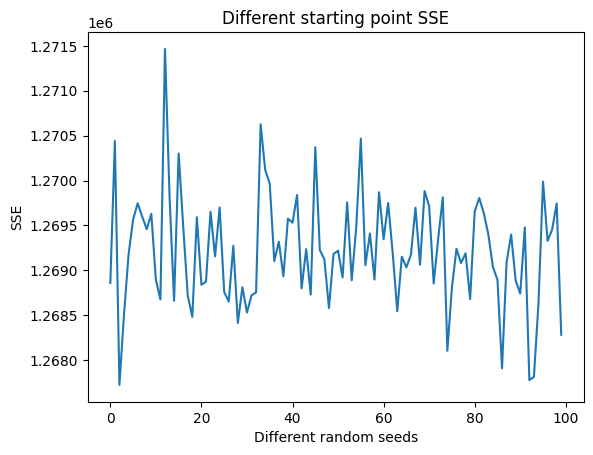

In [18]:
plt.plot(range(0 , 100) , plot_sse_list)
plt.title("Different starting point SSE")
plt.xlabel("Different random seeds")
plt.ylabel("SSE")

For the first run I didn't assgin centroids.

For the followup models, I ramdomly assign initial points with 100 differernt random seeds, and we can see from tge graph that initial point can impact the SSE profoundly.

### 5. More generally for any dataset, what evaluation metrics can be used to assess the quality of the clusters produced?

we can calculate the distance between each data point and the group of centroid it is assigned. Generally, the smaller the sum of distance the better. However, we do have to be carefull of the selection of number of clusters, since the sum of distances will generally always comes down while we increase the number of clusters, it is important for us to decide when should we stop increasing k, for which we can apply the elbow row to help us make the decision.

## 2. The Madelon dataset is high-dimensional, with 500 features per data point. Some of these features might be redundant or noisy, making clustering more difficult. 

### 1. Fit the standardized data with PCA. Then, create a cumulative variance plot – showing the number of components included (x-axis) versus the amount of variance captured (y-axis). Generally, we want to retain at least 75% of the variance. How many components would you decide to keep?

In [19]:
from sklearn.decomposition import PCA

In [20]:
percentage_of_variance = 0
k_075 = 0
percentage_list = []

for k_counter in range(2 , X.shape[1]):
    temp_pca = PCA(n_components = k_counter)
    temp_components = temp_pca.fit_transform(X)
    percentage_of_variance = sum(temp_pca.explained_variance_ratio_)
    percentage_list.append(percentage_of_variance)
    
    ### when percentage of variance greater than 0.75, and if first update
    if percentage_of_variance >= 0.75 and k_075 == 0:
        k_075 = k_counter

Text(282, 0.7500903706402628, 'First point over 75% , 0.7500903706402628')

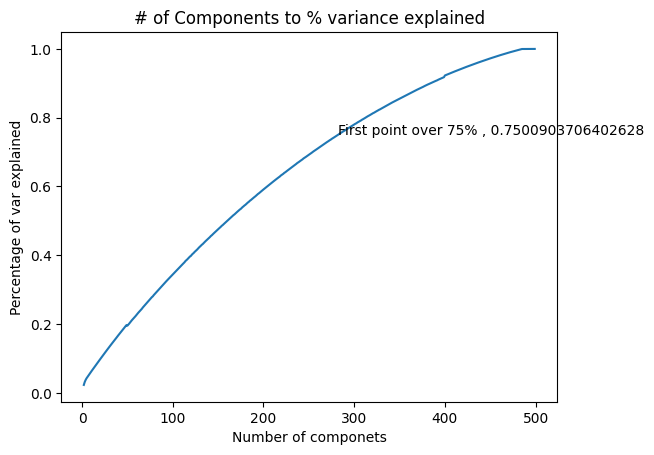

In [22]:
plt.plot(range(2 , 500) , percentage_list)
plt.xlabel("Number of componets")
plt.ylabel("Percentage of var explained")
plt.title("# of Components to % variance explained")
plt.text(k_075 , percentage_list[k_075 - 2] , f"First point over 75% , {percentage_list[k_075 - 2]}")

In [21]:
print("I decide to keep" , k_075 , "components, as it is the least number of components required to explain 75% of the variance")

I decide to keep 282 components, as it is the least number of components required to explain 75% of the variance


### Perform PCA with your selected principal components.

#### 1. Plot the transformed data on a graph with the first two principal components as the axes i.e. x = PC 1, y = PC 2.


In [23]:
pca_2 = PCA(n_components = 2)

principalComponents = pca_2.fit_transform(X)

In [24]:
### new df
component_df = pd.DataFrame(principalComponents , columns = ['component1' , 'component2'])

Text(0, 0.5, 'PC 2')

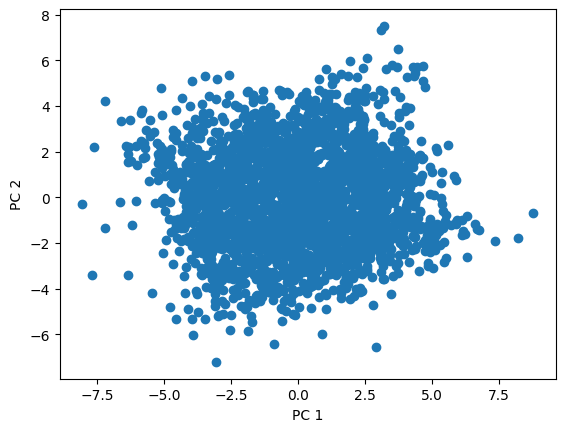

In [25]:
plt.scatter(component_df['component1'] , component_df['component2'])
plt.xlabel("PC 1")
plt.ylabel("PC 2")

#### 2.Plot the original data on a graph with the two original variables that have the highest absolute combined loading for PC 1 and PC 2 i.e. maximizing |loading PC1| + |loading PC2|.

In [26]:
### calculate loadings
loadings = pd.DataFrame(pca_2.components_.T , columns=['PC1' , 'PC2'])

### calculate max abs(pc1 + pc2)
loadings['abs(PC1+PC2)'] = np.absolute(loadings['PC1']) + np.absolute(loadings['PC2']) 

### making pc1 pc2 loadings dataframe and sort by sum absolute loadings
loadings = loadings.sort_values(by = 'abs(PC1+PC2)' , ascending = False)
highest_loading = [loadings.iloc[0].name , loadings.iloc[1].name]

Text(0, 0.5, 'Varaible 281')

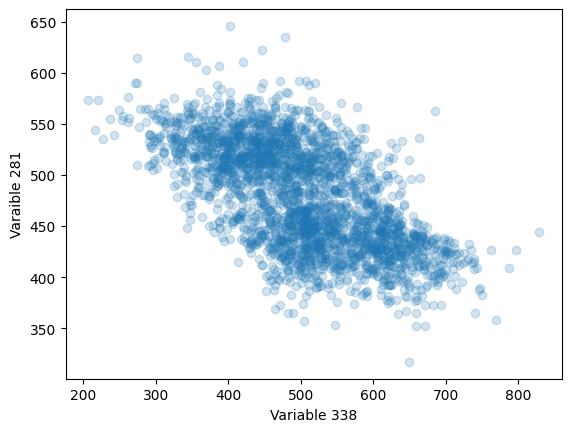

In [27]:
plt.scatter(madelon.iloc[:,highest_loading[0]] , madelon.iloc[:,highest_loading[1]] , alpha = 0.2)
plt.xlabel(f"Variable {highest_loading[0]}")
plt.ylabel(f"Varaible {highest_loading[1]}")

#### 3.Examine the scatter plot of PC 1 (x-axis) versus PC 2 (y-axis) for all data points that you created in the previous part. Qualitatively, can you identify visible clusters? Why or why not might this be the case with this particular dataset?

No, I can't really identify visual clusters, I think this is because the data is randomly generated which makes their variances normally distirbuted around axis.

## 3.   Now, we will run k-means clustering on the transformed data from the previous problem.



### 1. Why is it a good idea to do this, especially for high-dimensional datasets? Name a number of reasons.

1. Since we are having 500 dimensions, using PCA-transformed dataset can make the clusteting more efficient and accurate.

2. Running k-means on PCA-transformed data can also improve the stability of the clustering results, as the principal components are uncorrelated and have equal variance, which can prevent the dominance of any particular feature in the clustering process.

### 2. Use the same k values again (4, 8, 16, 32, 64) to again generate an elbow plot. 

In [28]:
### transform old dataset
pca = PCA(n_components = 282)
new_X = pca.fit_transform(X)

In [29]:
def kmeans_with_different_n(n , X):
    cluster = KMeans(n_clusters = n , random_state = 10)
    cluster.fit(X)
    SSE = cluster.inertia_
    print("SSE : " , SSE)
    return cluster.inertia_

In [30]:
pca_inertia = []

### Cluster of 4

In [31]:
cluster_4_sse = kmeans_with_different_n(4 , new_X)

pca_inertia.append(cluster_4_sse)

SSE :  952756.4358218978


### Cluster of 8

In [32]:
cluster_8_sse = kmeans_with_different_n(8 , new_X)

pca_inertia.append(cluster_8_sse)

SSE :  943372.099340847


### Cluster of 16

In [33]:
cluster_16_sse = kmeans_with_different_n(16 , new_X)

pca_inertia.append(cluster_16_sse)

SSE :  935192.6566322693


### Cluster of 32

In [34]:
cluster_32_sse = kmeans_with_different_n(32 , new_X)

pca_inertia.append(cluster_32_sse)

SSE :  925753.5118774816


### Cluster of 64

In [35]:
cluster_64_sse = kmeans_with_different_n(64 , new_X)

pca_inertia.append(cluster_64_sse)

SSE :  911302.5709788355


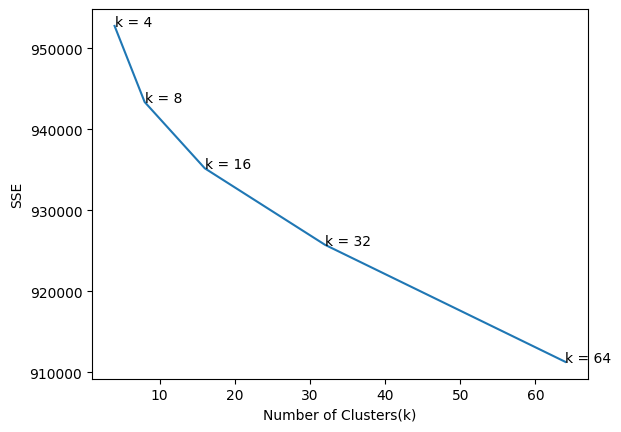

In [36]:
k_number = [4,8,16,32,64]

plt.plot(k_number , pca_inertia)
plt.xlabel("Number of Clusters(k)")
plt.ylabel("SSE")

for i, x_value in enumerate(k_number):
    plt.annotate(f"k = {x_value}", (k_number[i], pca_inertia[i]))

#### 1. What is the optimal k? Is it different from the one you found in (1)?

I think the optimal k is still 16, which is identical to the one I found in (1)

#### 2. Compare the SSE values plotted in this exercise to the previous plot you generated in (1c) before performing PCA.

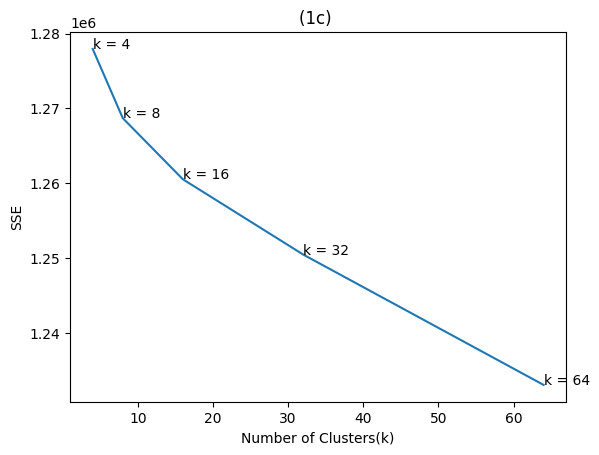

In [37]:
k_number = [4,8,16,32,64]

plt.plot(k_number , inertias)
plt.xlabel("Number of Clusters(k)")
plt.ylabel("SSE")
plt.title("(1c) ")

for i, x_value in enumerate(k_number):
    plt.annotate(f"k = {x_value}", (k_number[i], inertias[i]))

**Compare two plots**

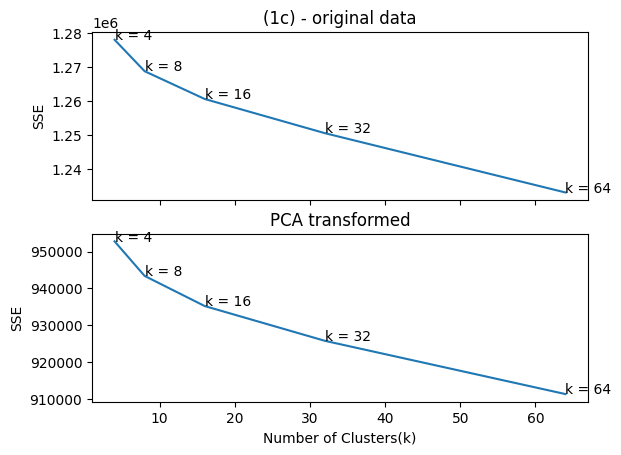

In [38]:
figure, axis = plt.subplots(2, 1 , sharex = True)

k_number = [4,8,16,32,64]

axis[0].plot(k_number , inertias, )
axis[0].set_ylabel("SSE")
axis[0].set_title("(1c) - original data")


for i, x_value in enumerate(k_number):
    axis[0].annotate(f"k = {x_value}", (k_number[i], inertias[i]))

axis[1].plot(k_number , pca_inertia)
axis[1].set_xlabel("Number of Clusters(k)")
axis[1].set_ylabel("SSE")
axis[1].set_title("PCA transformed")

for i, x_value in enumerate(k_number):
    axis[1].annotate(f"k = {x_value}", (k_number[i], pca_inertia[i]))

Transfromed data has lower SSE comparing to the original data.

### 3. Again, create a scatter plot of PC 1 (x-axis) versus PC 2 (y-axis) for all of the transformed data points. Label the cluster centers and color-code by cluster assignment for the first 5 iterations of k = 32. Can you see the algorithm begin to converge to optimal assignments?

In [39]:
def kmean_plot(max_it):
    kmeans = KMeans(n_clusters = 32,
                n_init= 10,
                max_iter = max_it,
                random_state = 10)

    kmeans.fit(new_X)

    ### make dataframe for plotting
    pca_12 = pd.DataFrame({'component 1' :new_X[:,0] , 'component 2' : new_X[:,1] , 'category' : kmeans.labels_})

    ### retrieve componenet 1, 2 centrals
    component1_32_central = []
    component2_32_central = []

    for cluster in kmeans.cluster_centers_:
        component1_32_central.append(cluster[0])
        component2_32_central.append(cluster[1])

    centrals = pd.DataFrame({'component 1' : component1_32_central , 'component 2' : component2_32_central} )

    scat = sns.scatterplot(
        data = pca_12 ,
        x = "component 1", 
        y = "component 2",
        hue = "category")

    plt.scatter(centrals['component 1'] , centrals['component 2'] , s = 80 , marker = '^' , c = 'r')

### Iteration 1

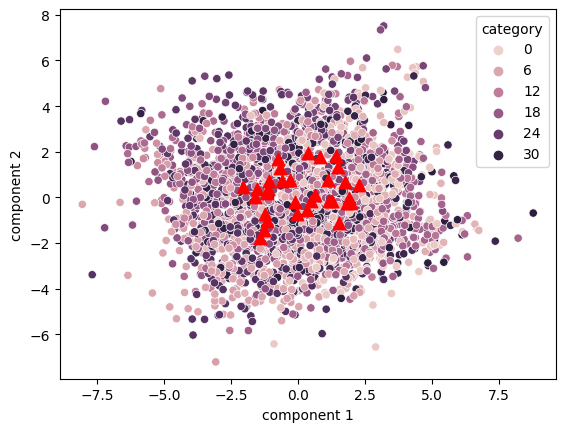

In [40]:
kmean_plot(1)

### Iteration 2

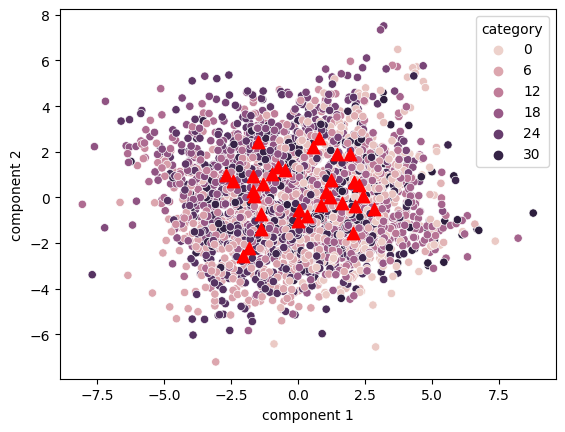

In [41]:
kmean_plot(2)

### Iteration 3

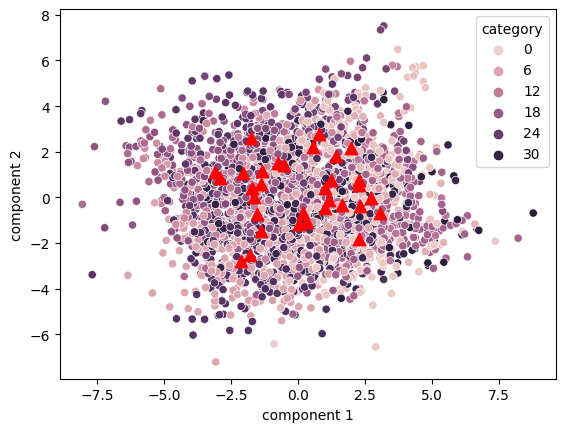

In [42]:
kmean_plot(3)

### Iteration 4

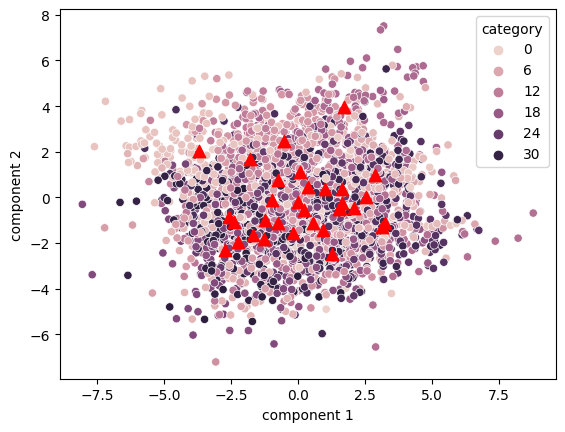

In [43]:
kmean_plot(4)

### Iteration 5

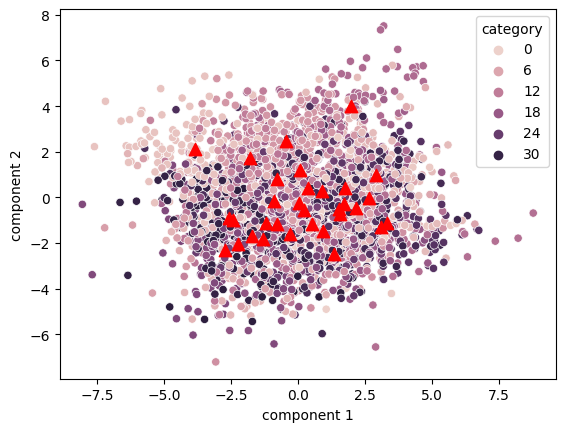

In [44]:
kmean_plot(5)

No I think the algorithm still doesn't converge to optimal assignments